In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
biometric1 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv")
biometric2 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv")
biometric3 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv")
biometric4 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv")

demo1 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv")
demo2 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv")
demo3 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv")
demo4 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv")
demo5 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv")

enroll1 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv")
enroll2 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv")
enroll3 = pd.read_csv("C:/Desktop/For_hackathons/NDH/datasets/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv")

TypeError: 'Index' object is not callable

In [15]:
biometric = pd.concat([biometric1, biometric2, biometric3, biometric4], ignore_index=True)
demographic = pd.concat([demo1, demo2, demo3, demo4, demo5], ignore_index=True)
enrolment = pd.concat([enroll1, enroll2, enroll3], ignore_index=True)

In [28]:
#renaming columns

biometric = biometric.rename(columns={
    "bio_age_5_17": "bio_5_17",
    "bio_age_17_": "bio_17_plus"
})

demographic = demographic.rename(columns={
    "demo_age_5_17": "demo_5_17",
    "demo_age_17_": "demo_18_plus"
})

enrolment = enrolment.rename(columns={
    "age_0_5": "enroll_0_5",
    "age_5_17": "enroll_5_17",
    "age_18_greater": "enroll_18_plus"
})

In [29]:
#merging different datasets

merged = biometric.merge(
    demographic,
    on=["date", "state", "district", "pincode"],
    how="inner"
).merge(
    enrolment,
    on=["date", "state", "district", "pincode"],
    how="inner"
)

print("Merged dataset shape:", merged.shape)
print(merged.head(5))
print(merged.tail(5))

Merged dataset shape: (756586, 11)
         date      state   district  pincode  bio_5_17  bio_17_plus  \
0  01-04-2025  Rajasthan      Churu   331403       598          735   
1  01-04-2025  Rajasthan      Churu   331403       598          735   
2  01-04-2025  Karnataka  Bengaluru   560032       485          471   
3  01-04-2025  Karnataka  Bengaluru   560032       485          471   
4  01-04-2025    Gujarat   Mahesana   384001       364          577   

   demo_5_17  demo_18_plus  enroll_0_5  enroll_5_17  enroll_18_plus  
0        170          1401         316          141              12  
1        170          1401         316          141              12  
2        150           885         311           46              25  
3        150           885         311           46              25  
4        155           818         120           15              25  
              date        state                    district  pincode  \
756581  29-12-2025  West Bengal           Sout

In [31]:
merged["total_bio"] = merged["bio_5_17"] + merged["bio_17_plus"]
merged["total_demo"] = merged["demo_5_17"] + merged["demo_18_plus"]
merged["total_enroll"] = merged["enroll_0_5"] + merged["enroll_5_17"] + merged["enroll_18_plus"]

merged["biometric_ratio"] = merged["total_bio"] / (merged["total_enroll"] + 1)
merged["demo_ratio"] = merged["total_demo"] / (merged["total_enroll"] + 1)


State Summary:
                                           total_bio  total_demo  total_enroll
state                                                                        
Andaman and Nicobar Islands                    1633        1022           308
Andhra Pradesh                               640383      497171         99158
Arunachal Pradesh                             14672       13049          3123
Assam                                        336483      435955        122570
Bihar                                       1144430     2412048        367436
Chandigarh                                    10903       15301          2275
Chhattisgarh                                 780953      550997         83201
Dadra and Nagar Haveli and Daman and Diu       7136        3661           661
Goa                                            9333        7785          1612
Gujarat                                      704287      715408        158691
Haryana                                      50

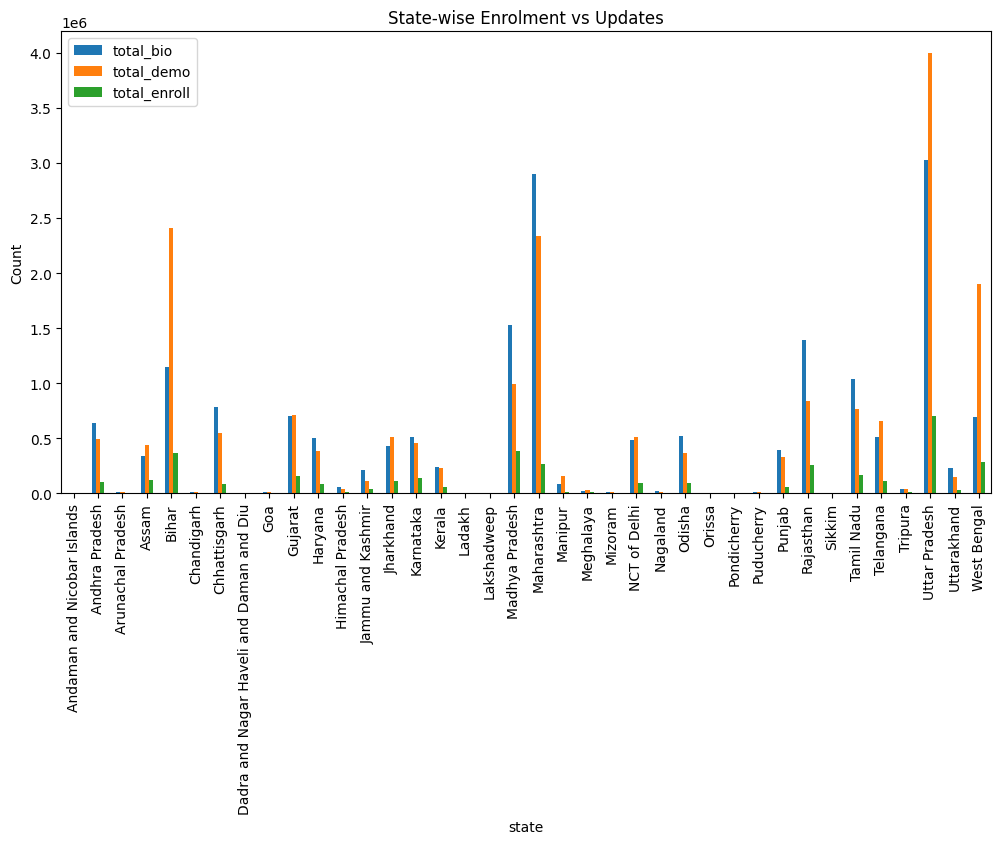

In [38]:
state_fix_map = {
    "Andaman And Nicobar Islands": "Andaman and Nicobar Islands",
    "Andaman and Nicobar Islands": "Andaman and Nicobar Islands",
    "Andaman & Nicobar Islands": "Andaman and Nicobar Islands",

    "Dadra And Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "Dadra & Nagar Haveli": "Dadra and Nagar Haveli and Daman and Diu",
    "Dadra And Nagar Haveli And Daman And Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "Dadra and Nagar Haveli and Daman and Diu": "Dadra and Nagar Haveli and Daman and Diu",

    "Daman And Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "Daman & Diu": "Dadra and Nagar Haveli and Daman and Diu",
    "Daman and Diu": "Dadra and Nagar Haveli and Daman and Diu",

    "Jammu & Kashmir": "Jammu and Kashmir",
    "Jammu And Kashmir": "Jammu and Kashmir",
    "Jammu and Kashmir": "Jammu and Kashmir",

    "Nct Of Delhi": "NCT of Delhi",
    "Delhi": "NCT of Delhi",

    "Westbengal": "West Bengal",
    "West Bengal": "West Bengal",
}


def normalize_state(s):
    if pd.isna(s):
        return s
    s = s.strip()
    s = s.replace("\u00A0", " ")
    s = s.replace("-", " ")
    s = " ".join(s.split())
    s = s.title()
    return state_fix_map.get(s, s)

biometric["state"] = biometric["state"].apply(normalize_state)
demographic["state"] = demographic["state"].apply(normalize_state)
enrolment["state"] = enrolment["state"].apply(normalize_state)

merged["state"] = merged["state"].apply(normalize_state)

state_summary = merged.groupby("state")[["total_bio", "total_demo", "total_enroll"]].sum()
print("\nState Summary:\n", state_summary)

state_summary.plot(kind="bar", figsize=(12,6))
plt.title("State-wise Enrolment vs Updates")
plt.ylabel("Count")
plt.show()

In [39]:
merged["z_bio"] = (merged["total_bio"] - merged["total_bio"].mean()) / merged["total_bio"].std()
merged["z_demo"] = (merged["total_demo"] - merged["total_demo"].mean()) / merged["total_demo"].std()

anomalies = merged[(merged["z_bio"].abs() > 3) | (merged["z_demo"].abs() > 3)]
print("\nAnomalies Detected:\n", anomalies.head())


Anomalies Detected:
          date      state   district  pincode  bio_5_17  bio_17_plus  \
0  01-04-2025  Rajasthan      Churu   331403       598          735   
1  01-04-2025  Rajasthan      Churu   331403       598          735   
2  01-04-2025  Karnataka  Bengaluru   560032       485          471   
3  01-04-2025  Karnataka  Bengaluru   560032       485          471   
4  01-04-2025    Gujarat   Mahesana   384001       364          577   

   demo_5_17  demo_18_plus  enroll_0_5  enroll_5_17  enroll_18_plus  \
0        170          1401         316          141              12   
1        170          1401         316          141              12   
2        150           885         311           46              25   
3        150           885         311           46              25   
4        155           818         120           15              25   

   total_bio  total_demo  total_enroll  biometric_ratio  demo_ratio  \
0       1333        1571           469         2.8361

In [45]:
anomaly_summary = anomalies.groupby(["state", "district"])[["total_bio", "total_demo", "total_enroll"]].sum()
print("Anomaly summary:")
print(anomaly_summary)

anomalies["severity"] = anomalies["biometric_ratio"] + anomalies["demo_ratio"]

top10 = anomalies.sort_values("severity", ascending=False).head(10)
print("Top 10 anomalies detected:")
print(top10)

Anomaly summary:
                                  total_bio  total_demo  total_enroll
state          district                                              
Andhra Pradesh Chittoor                 678         320            10
Assam          Barpeta                 1203        2103          1004
               Bongaigaon              2849        4355           463
               Dhubri                   634        2198           454
               Goalpara                1442        3998          2778
...                                     ...         ...           ...
West Bengal    Nadia                     64         777            17
               Paschim Medinipur        478        4983            91
               Puruliya                 309        2395            66
               South 24 Parganas       2040        9402           636
               Uttar Dinajpur          9057       38288          7292

[222 rows x 3 columns]
Top 10 anomalies detected:
              date    

C:\Users\singh\AppData\Local\Temp\ipykernel_5516\3347723358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies["severity"] = anomalies["biometric_ratio"] + anomalies["demo_ratio"]
